# Regresión lineal con datos sintéticos

### Daniel Marín López

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import sklearn.metrics as Metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

Creamos variables globales y funciones para graficar.

In [ ]:
SEED = 42
TEST = 0.2
FONT_SIZE = 14
FIG_SIZE = (8, 6)
CV = 5

def draw_data(x, y, title):
  plt.figure(figsize=FIG_SIZE)
  sns.scatterplot(x=x, y=y)
  plt.xlabel('$x$', fontsize=FONT_SIZE)
  plt.ylabel('$y$', rotation=0, fontsize=FONT_SIZE)
  plt.title(title)
  plt.show()

def draw_predictions(x, y, y_predict, title):
  plt.figure(figsize=FIG_SIZE)
  sns.scatterplot(x=x, y=y)
  plt.plot(x, y_predict, color='red')
  plt.xlabel('$x$', fontsize=FONT_SIZE)
  plt.ylabel('$y$', rotation=0, fontsize=FONT_SIZE)
  plt.title(title)
  plt.show()

---
### Ejercicio 1

Cargamos los datos:

In [ ]:
data1 = pd.read_csv('rl1.csv')
data1.head()

,x,y
0,24,133
1,35,187
2,36,189
3,36,183
4,42,220


Visualizamos los datos, aparentemente parece una línea.

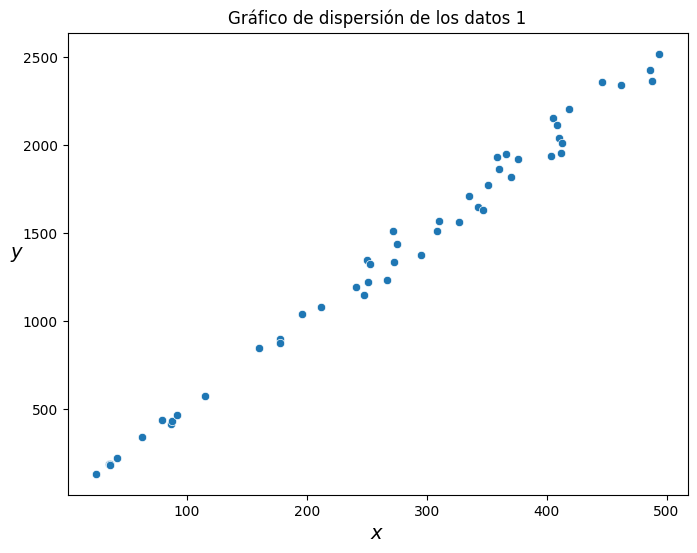

In [ ]:
draw_data(data1['x'], data1['y'], 'Gráfico de dispersión de los datos 1')

In [ ]:
X = data1['x']
y = data1['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST, random_state=SEED)

In [ ]:
standard_scaler01 = StandardScaler()
X_train_s = standard_scaler01.fit_transform(X_train.values.reshape(-1, 1))
X_test_s = standard_scaler01.transform(X_test.values.reshape(-1, 1))

Será un modelo simple de regresión lineal. Su ecuación se define de la siguiente forma:
$
y = ax + b
$

In [ ]:
linear_model1 = LinearRegression()
linear_model1.fit(X_train_s, y_train)

print('Coeficientes: ', linear_model1.coef_)
print('Intercepto: ', linear_model1.intercept_)
print(f'Ecuación de la recta: y = {round(linear_model1.intercept_, 2)} + {round(linear_model1.coef_[0], 2)}x')

Coeficientes:  [716.37720924]
Intercepto:  1309.8
Ecuación de la recta: y = 1309.8 + 716.38x


Visualizamos como queda el modelo.

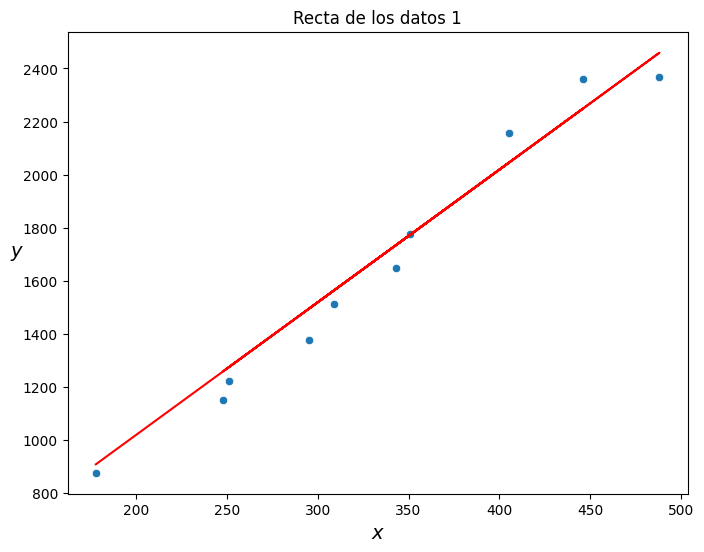

MSE:  7318.063073904106
R2:  0.9697839942766634


In [ ]:
y_predict_1 = linear_model1.predict(X_test_s)
draw_predictions(X_test, y_test, y_predict_1.ravel(), 'Recta de los datos 1')
print('MSE: ', Metrics.mean_squared_error(y_test, y_predict_1))
print('R2: ', Metrics.r2_score(y_test, y_predict_1))

---
### Ejercicio 2

Cargamos los datos.

In [ ]:
data2 = pd.read_csv('rl2.csv')
data2.head()

,x,y
0,24,3115
1,35,5717
2,36,6387
3,36,6616
4,42,9666


Visualizamos los datos, en este caso los datos presentan una curvatura claramente.

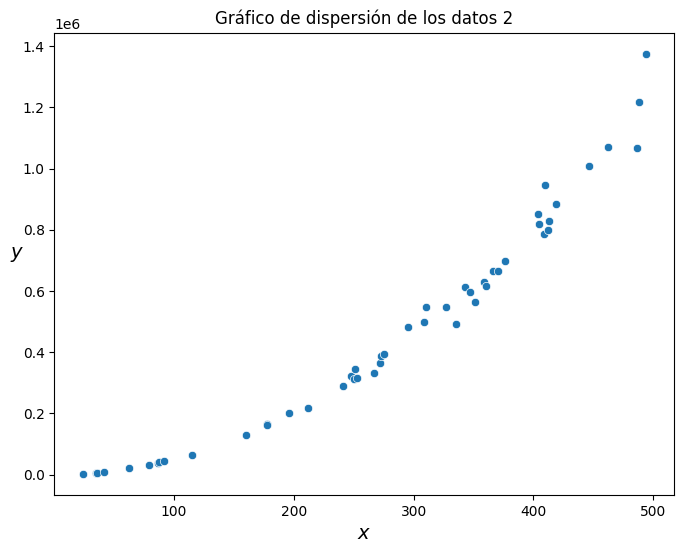

In [ ]:
draw_data(data2['x'], data2['y'], 'Gráfico de dispersión de los datos 2')

Como tenemos los datos en una curva, necesitamos crear una nueva columna para la variable de la $x^2$. Esto nos dará un nuevo coeficiente que representará la curva. Para ello usaremos `column_stack` que apilrá los datos, en nuestro caso, a la izquierda de los originales. Esto será importante para cuando tengamos que representar los datos.

In [ ]:
X = data2['x']
y = data2['y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST, random_state=SEED)
X_train = np.column_stack((X_train**2, X_train))
X_test = np.column_stack((X_test**2, X_test))

Tenemos que reordenar los índices correctamente para que a la hora de graficar nuestro resultado aparezca de manera correcta.

In [ ]:
sorted_index = np.argsort(X_test[:, 0])
X_test = X_test[sorted_index]
y_test = y_test.iloc[sorted_index]

In [ ]:
standard_scaler02 = StandardScaler()
X_train_s = standard_scaler02.fit_transform(X_train)
X_test_s = standard_scaler02.transform(X_test)

Con la nueva característica, ahora podemos represenatar esta regresión con un nuevo coeficiente:

$$
y = a_1x^2 + a_2x + b
$$

Donde $b$ sigue siendo el término independiente mientras que las características/coeficientes son $[a_1, a_2]$.

In [ ]:
linear_model2 = LinearRegression()
linear_model2.fit(X_train_s, y_train)

y_predict_2 = linear_model2.predict(X_test_s)

print('Coeficiente 1: ', linear_model2.coef_[0])
print('Coeficiente 2: ', linear_model2.coef_[1])
print('Intercepto: ', linear_model2.intercept_)
print(f'Polinomio y = {round(linear_model2.intercept_, 2)} + {round(linear_model2.coef_[0], 2)}x^2 + {round(linear_model2.coef_[1], 2)}x')

Coeficiente 1:  371618.8519675423
Coeficiente 2:  -12674.146801064773
Intercepto:  436510.15
Polinomio y = 436510.15 + 371618.85x^2 + -12674.15x


Visualizamos el modelo, vemos que efectivamente se traza la curva correctamente. Un modelo simple de regresión lineal no hubiera podido pasar por todos los puntos. Para poder mostrar los datos, debemos pasarle las predicciones como un array unidimensional y luego debemos pasar la característica original de nuestro dataset. Como hemos apilado los datos por la **izquierda**, la última columna de la X serán los datos originales que queremos representar.

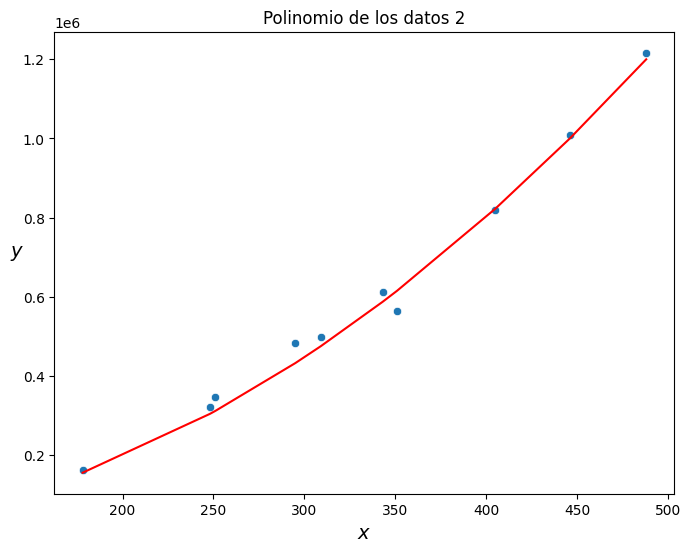

MSE:  825865610.0258671
R2:  0.9913367574686124


In [ ]:
draw_predictions(X_test[:,-1], y_test, y_predict_2.ravel(), 'Polinomio de los datos 2')
print('MSE: ', Metrics.mean_squared_error(y_test, y_predict_2))
print('R2: ', Metrics.r2_score(y_test, y_predict_2))

---
### Ejercicio 3

Cargamos los datos.

In [ ]:
data3 = pd.read_csv('rl3.csv')
data3.head()

,x,y
0,24,82945
1,35,257251
2,36,279937
3,36,279937
4,42,444529


Visualizamos los datos, vemos que los puntos están mucho más juntos.

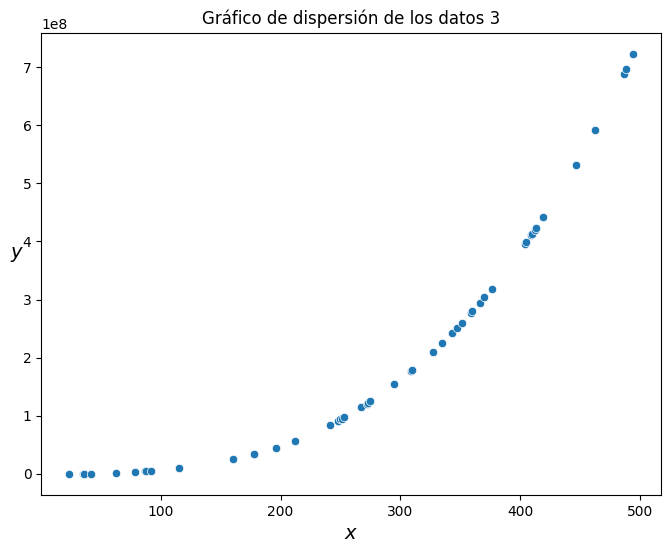

In [ ]:
draw_data(data3['x'], data3['y'], 'Gráfico de dispersión de los datos 3')

Realizamos los mismos pasos que antes para controlar la curva y ordenar los índices.

In [ ]:
X = data3['x']
y = data3['y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST, random_state=SEED)
X_train = np.column_stack((X_train**2, X_train))
X_test = np.column_stack((X_test**2, X_test))

In [ ]:
sorted_index = np.argsort(X_test[:, 0])
X_test = X_test[sorted_index]
y_test = y_test.iloc[sorted_index]

In [ ]:
standard_scaler03 = StandardScaler()
X_train_s = standard_scaler03.fit_transform(X_train)
X_test_s = standard_scaler03.transform(X_test)

Ahora creamos la curva.

In [ ]:
linear_model3 = LinearRegression()
linear_model3.fit(X_train_s, y_train)

y_predict_3 = linear_model3.predict(X_test_s)

print('Coeficiente 1: ', linear_model3.coef_[0])
print('Coeficiente 2: ', linear_model3.coef_[1])
print('Intercepto: ', linear_model3.intercept_)
print(f'Polinomio y = {round(linear_model3.intercept_, 2)} + {round(linear_model3.coef_[0], 2)}x^2 + {round(linear_model3.coef_[1], 2)}x')

Coeficiente 1:  331510627.3263273
Coeficiente 2:  -139522740.97607952
Intercepto:  194788293.55
Polinomio y = 194788293.55 + 331510627.33x^2 + -139522740.98x


La representación muestra que el modelo es curva, pero no sigue a la perfección los puntos.

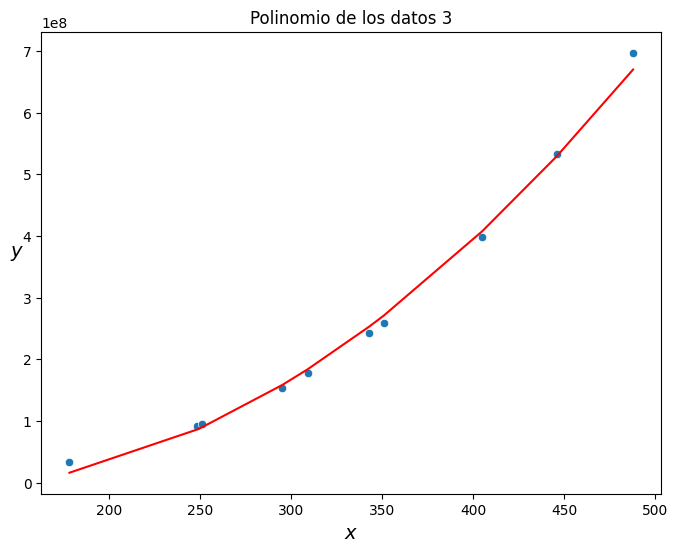

MSE:  153781715513663.3
R2:  0.9962414113649171


In [ ]:
draw_predictions(X_test[:,-1], y_test, y_predict_3.ravel(), 'Polinomio de los datos 3')
print('MSE: ', Metrics.mean_squared_error(y_test, y_predict_3))
print('R2: ', Metrics.r2_score(y_test, y_predict_3))

Otra forma de trabajar con polinomios, es usar `PolynomialFeatures`. Indicando el grado deseado para el que queremos ajustar la X, usamos un polinomio de 4º grado por ejemplo. El parámetro `include_bias` incluirá el intercepto si está a `True`, como no deseamos incluirlo ponemos `False`.

In [ ]:
X = data3['x']
y = data3['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST, random_state=SEED)

In [ ]:
polynomial_3 = PolynomialFeatures(degree=4, include_bias=False)
X_train = polynomial_3.fit_transform(X_train.values.reshape(-1, 1))
X_test = polynomial_3.transform(X_test.values.reshape(-1, 1))

Reordenamos los índices y escalamos.

In [ ]:
sorted_index = np.argsort(X_test[:, 2])
X_test = X_test[sorted_index]
y_test = y_test.iloc[sorted_index]

In [ ]:
standard_scaler04 = StandardScaler()
X_train_s = standard_scaler04.fit_transform(X_train)
X_test_s = standard_scaler04.transform(X_test)

Como hemos indicado anteriormente, el polinomio tendrá 4 coeficientes en este caso.

In [ ]:
linear_model3 = LinearRegression()
linear_model3.fit(X_train_s, y_train)

y_predict_3 = linear_model3.predict(X_test_s)

print('Coeficiente 1: ', linear_model3.coef_[0])
print('Coeficiente 2: ', linear_model3.coef_[1])
print('Coeficiente 3: ', linear_model3.coef_[2])
print('Coeficiente 4: ', linear_model3.coef_[3])
print('Intercepto: ', linear_model3.intercept_)

Coeficiente 1:  1.2357407168556288e-08
Coeficiente 2:  5.960464477539063e-08
Coeficiente 3:  199489487.47434205
Coeficiente 4:  1.1920928955078125e-07
Intercepto:  194788293.55


A la hora de representar los puntos vemos como la curva ahora se ajusta correctamente sin problemas.

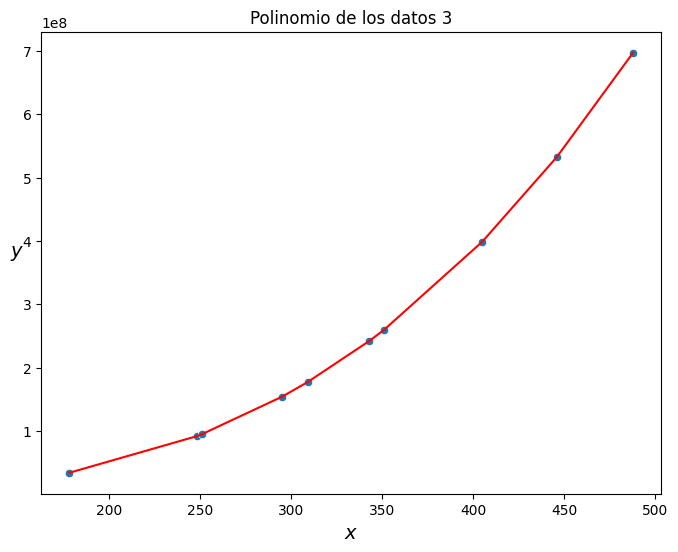

MSE:  6.150635556423367e-15
R2:  1.0


In [ ]:
draw_predictions(X_test[:,0], y_test, y_predict_3.ravel(), 'Polinomio de los datos 3')
print('MSE: ', Metrics.mean_squared_error(y_test, y_predict_3))
print('R2: ', Metrics.r2_score(y_test, y_predict_3))

Es posible que si hubieramos puesto que fuera de grado 3, también lo hubiera hecho muy bien.